<a href="https://colab.research.google.com/github/Maksimka9/klustering/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Зависимости

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot
import sklearn
from sklearn import cluster
from sklearn import datasets

In [2]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
#test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

filename = r"https://github.com/Maksimka9/klustering/blob/main/prepared_data_sem_1.csv?raw=true"
df = pd.read_csv(filename, index_col=False)
df

,subj_административное право,subj_академическая живопись,subj_академический рисунок,subj_академический рисунок и скульптура,subj_актуальные вопросы финансов,subj_актуальные проблемы финансов,subj_алгебра логики и дискретный анализ,subj_анализ статистической информации с помощью пакетов прикладных программ,subj_аналитическая геометрия,subj_анатомия и физиология человека,subj_анатомия центральной нервной системы,subj_астрономия,subj_безопасность жизнедеятельности,subj_биология,subj_бухгалтерский учет и аудит,subj_бюджетирование и корпоративное финансовое планирование,subj_бюджетная система рф,subj_введение в коммуникационные специальности,subj_введение в профессию,"subj_введение в профессию ""управление качеством""",subj_введение в специальность,subj_введение в специальную технику,subj_введение в языкознание,subj_всеобщая история,subj_выполнение работ по должности служащего делопроизводитель,"subj_выполнение работ по одной или нескольким профессиям рабочих, должностям служащих",subj_выполнение работ по профессии «кассир»,subj_высшая математика,subj_география,subj_государственное регулирование экономики,subj_гражданский процесс,subj_девиантология,subj_деловая этика,subj_деловой иностранный язык,subj_деловые коммуникации,subj_дизайн и монументально-декоративное искусство в формировании среды,subj_дизайн проектирования,subj_дизайн-проектирование,subj_документационное обеспечение управления,subj_документоведение,...,subj_теория организации и организационное поведение,subj_техническая механика,subj_техническое черчение,subj_технологии и среды программирования,subj_технология ведения домашнего хозяйства,subj_технология создания и обработки цифровой информации,subj_уп учебная практика,"subj_управление качеством проекта, проектная документация",subj_управленческая экономика,subj_учебная практика,subj_учебная: ознакомительная практика,subj_учебная: практика по получению первичных профессиональных умений и навыков,"subj_учебная: практика по получению первичных профессиональных умений и навыков, в том числе первичных умений и навыков научно-исследовательской деятельности",subj_учебная: творческая практика,subj_физика,subj_физическая культура,subj_физкультура,subj_философия,subj_философия и методология социальных наук,subj_философские проблемы науки и техники,"subj_финансы, денежное обращение и кредит",subj_формирование клиентской базы,subj_химия,subj_экологические основы природопользования,subj_экология,subj_экономика,subj_экономика организации,subj_экономика предприятия,subj_экономика предприятия и организация производства,subj_экономико-математические методы моделирования,subj_экономическая социология в россии,subj_экономическая теория,subj_элективные курсы по физической культуре,subj_элективные курсы по физической культуре и спорту,subj_электротехника и электроника,subj_электротехника и электронная техника,subj_элементы высшей математики,subj_этика делового общения,subj_этика деловых отношений,subj_языки высокого уровня
0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [3]:
# Нормализуем данные (среднее значение=0, дисперсия=1)

from sklearn.preprocessing import StandardScaler

standart_df = StandardScaler().fit_transform(df)
standart_df

array([[-0.08898386, -0.08864316, -0.05400952, ..., -0.09680422,
        -0.05373087,  7.96034459],
       [-0.08898386, -0.08864316, -0.05400952, ..., -0.09680422,
        -0.05373087, -0.12119854],
       [-0.08898386, -0.08864316, -0.05400952, ..., -0.09680422,
        -0.05373087, -0.12119854],
       ...,
       [-0.08898386, -0.08864316, -0.05400952, ..., -0.09680422,
        -0.05373087, -0.12119854],
       [-0.08898386, -0.08864316, -0.05400952, ..., -0.09680422,
        -0.05373087, -0.12119854],
       [-0.08898386, -0.08864316, -0.05400952, ..., -0.09680422,
        -0.05373087, -0.12119854]])

In [4]:
# Применяем PCA к кластеризованным данным
from sklearn.decomposition import PCA

reduced_df = PCA(n_components=2).fit_transform(standart_df) # Выбираем кол-во компонент, которые нужно оставить, и сами данные
reduced_df = pd.DataFrame(reduced_df) # Превращаем результаты обратно в удобный вид
reduced_df

,0,1
0,4.713562,-8.399085
1,-2.662635,2.430748
2,-2.008530,2.051443
3,0.426086,-0.495423
4,-1.335557,1.034520
...,...,...
9847,-0.625427,-0.759147
9848,0.746141,-3.684101
9849,16.651983,15.291540
9850,-3.113921,2.724905


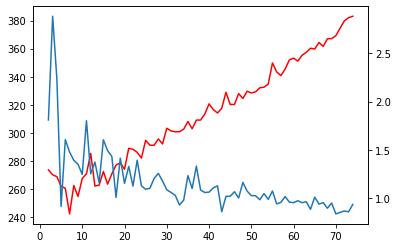

Калински-Харабаз: 74 383.10330881884556
Дэвис-Боулдин: 70 0.8325783019869557


In [18]:
# Посчитаем коэффициент силуэта и инерцию - метрики кластеризации, чтобы понять насколько хорошо была проведена кластеризация.

from sklearn.metrics import silhouette_score

inertia_dict = {} # Создаём словарь для значений инерции и коэффициента силуэта по каждому кластеру
silhouette_dict = {}
calinski_score_dict = {}
davies_score_dict = {}
# iteration_list = []


for k in range(2, 75):
  k_means = sklearn.cluster.KMeans(n_clusters=k, n_init=100, random_state=15) # Создаём экземпляр класса, где указываем количество кластеров и количество прогонов для одного значения (n_init)
  y = k_means.fit_predict(standart_df) # Вычисляем к какому элементу отнести каждый кластер
  transfer_list_inertia = {k: k_means.inertia_} # Записываем данные во вспомогательный словарь в формате {Кол-во кластеров: инерция}
  transfer_list_silhouette = {k: silhouette_score(standart_df, y)} # Записываем данные во вспомогательный словарь в формате {Кол-во кластеров: к-т силуэта}
  transfer_list_calinski = {k: sklearn.metrics.calinski_harabasz_score(standart_df, y)}
  transfer_list_davies = {k: sklearn.metrics.davies_bouldin_score(standart_df, y)}
  inertia_dict.update(transfer_list_inertia) # Переносим данные в главные словари
  silhouette_dict.update(transfer_list_silhouette)
  calinski_score_dict.update(transfer_list_calinski)
  davies_score_dict.update(transfer_list_davies)
  # iteration_list.append(k_means.n_iter_)
  del(transfer_list_inertia) # Удаляем вспомогательные словари
  del(transfer_list_silhouette)
  del(transfer_list_calinski)
  del(transfer_list_davies)


inertia_df = pd.DataFrame.from_dict(inertia_dict, orient='index') # Создаём pandas dataframe из словарей
silhouette_df = pd.DataFrame.from_dict(silhouette_dict, orient='index') 
calinski_df = pd.DataFrame.from_dict(calinski_score_dict, orient='index')
davies_df = pd.DataFrame.from_dict(davies_score_dict, orient='index')


figure = matplotlib.figure.Figure() # Создаём экземпляр класса Figure
axis_1 = figure.add_subplot() # Создаём вспомогательную ось графика
axis_1.plot(calinski_df, c='r') # Указываем интервал для оси
axis_2 = axis_1.twinx() # Добавляем вторую ось
axis_2.plot(davies_df) # Указываем интервал
display(figure) # Выводим на экран

# Выведем значение силуэта (оно минимизируется при использовании алгоритма k-средних)

print('Калински-Харабаз:', max(calinski_score_dict, key=calinski_score_dict.get), max(calinski_score_dict.values()))

# Выведем значение инерции (оно минимизируется при использовании алгоритма k-средних)

print('Дэвис-Боулдин:', min(davies_score_dict, key=davies_score_dict.get), min(davies_score_dict.values()))

# silhouette_score(x,cluster.labels_)

In [9]:
# делаем кластеризацию вручную на определенном кол-ве кластеров

kmeans = sklearn.cluster.KMeans(n_clusters = 7)
processed_df = kmeans.fit_predict(standart_df) # Вычисляем к какому элементу отнести каждый кластер
processed_df

array([2, 0, 0, ..., 5, 0, 0], dtype=int32)

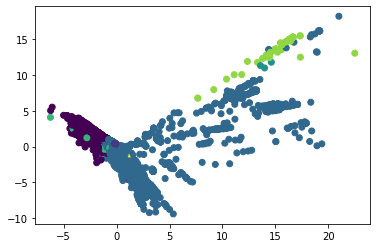

In [10]:
# Отобразим набор данных, используя разные цвета для разных кластеров
matplotlib.pyplot.scatter(reduced_df[0], reduced_df[1], c = processed_df) # с - используемые цвета
matplotlib.pyplot.show()